# DBSCAN - мини-проект

## Данные: Wholesale customers Data Set


Источник данных: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers


Описание атрибутов:

    1) FRESH: расходы за год на свежие продукты (непрерывная переменная);
    2) MILK: расходы за год на молочные продукты (непрерывная переменная);
    3) GROCERY: расходы за год на продовольственные товары / бакалея (непрерывная переменная);
    4) FROZEN: расходы за год на замороженные продукты (непрерывная переменная)
    5) DETERGENTS_PAPER: расходы за год на моющие средства и бумажные изделия (непрерывная переменная)
    6) DELICATESSEN: расходы за год на деликатесы (непрерывная переменная);
    7) CHANNEL: канал клиента - индустрия общественного питания Horeca (отели/рестораны/кафе) или розничный канал Retail (Категориальная переменная)
    8) REGION: регион клиента - Lisnon, Oporto или Other (Категориальная переменная)
 

Исходные статьи:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN и примеры кластеризации данных


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Исследование данных (EDA - Exploratory Data Analysis)


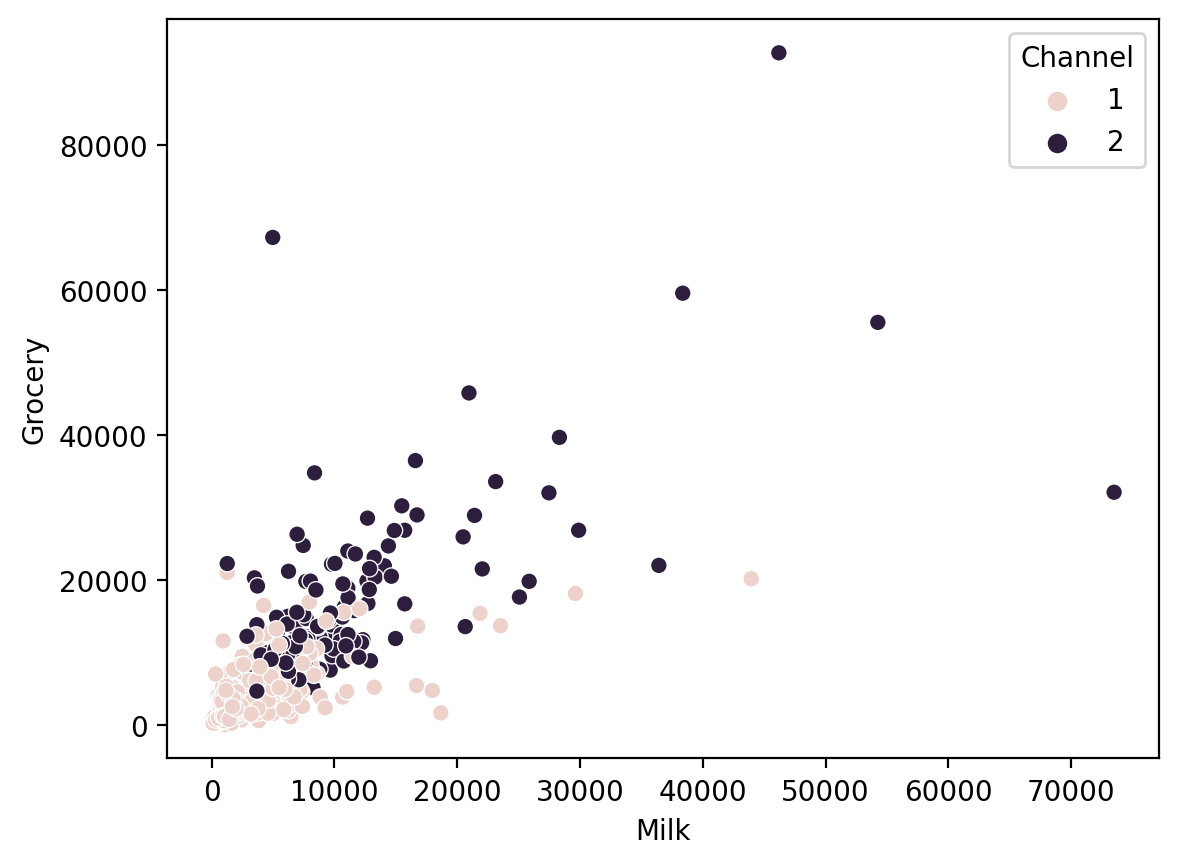

In [5]:
plt.figure(dpi = 200);
sns.scatterplot(data = df, x = 'Milk', y = 'Grocery', hue = 'Channel');

**Построим гистограмму для колонки MILK, выполняя раскраску цветами по колонке Channel.**

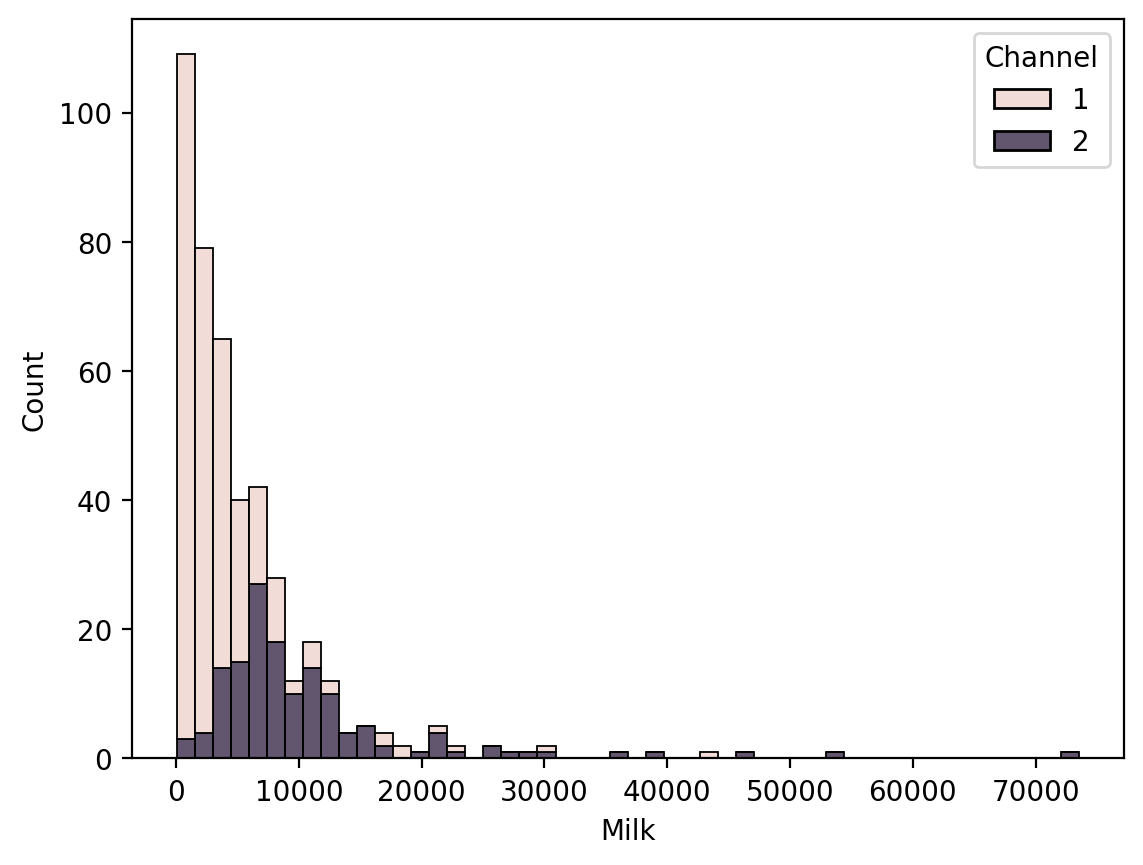

In [12]:
plt.figure(dpi = 200);
sns.histplot(data = df, x = 'Milk', hue = 'Channel', multiple = 'stack');

**Построим график clustermap для корреляций расходов по различным категориям.**

<Figure size 1280x960 with 0 Axes>

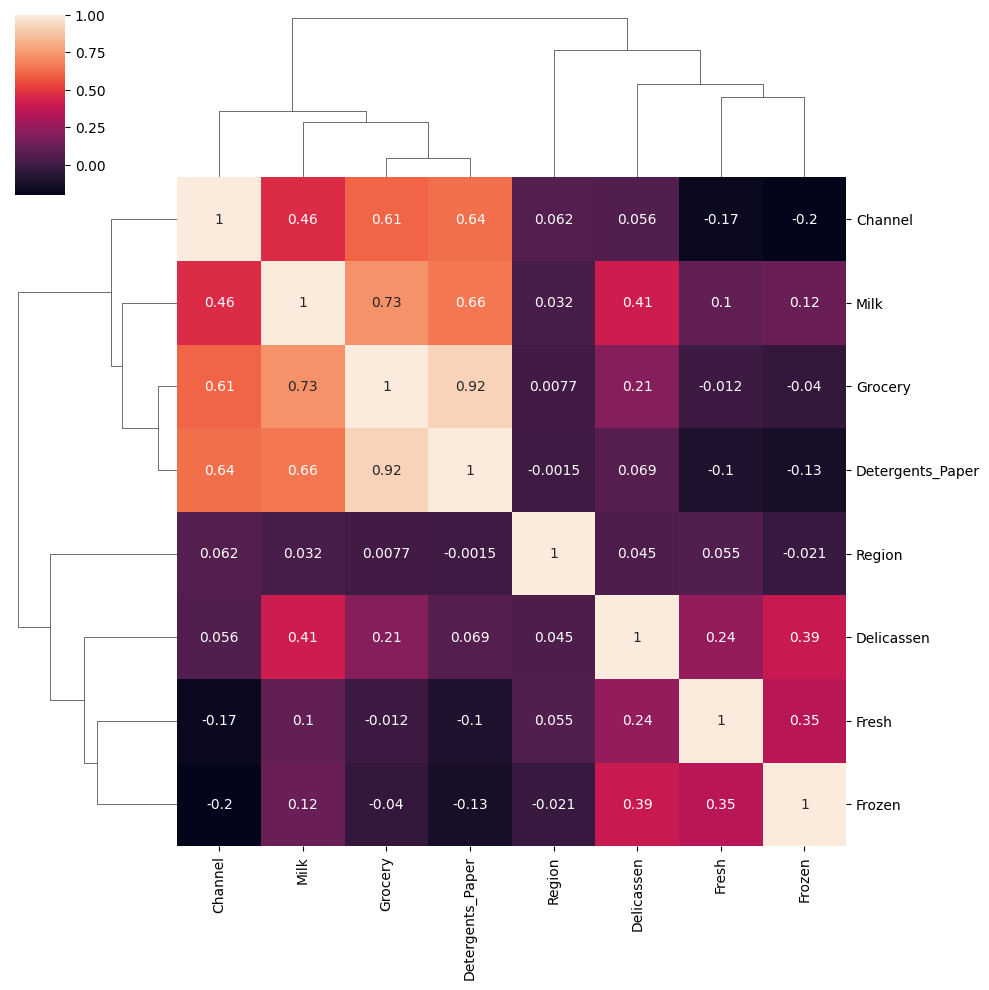

In [13]:
plt.figure(dpi = 200);
sns.clustermap(data = df.corr(), annot = True);

<Figure size 1280x960 with 0 Axes>

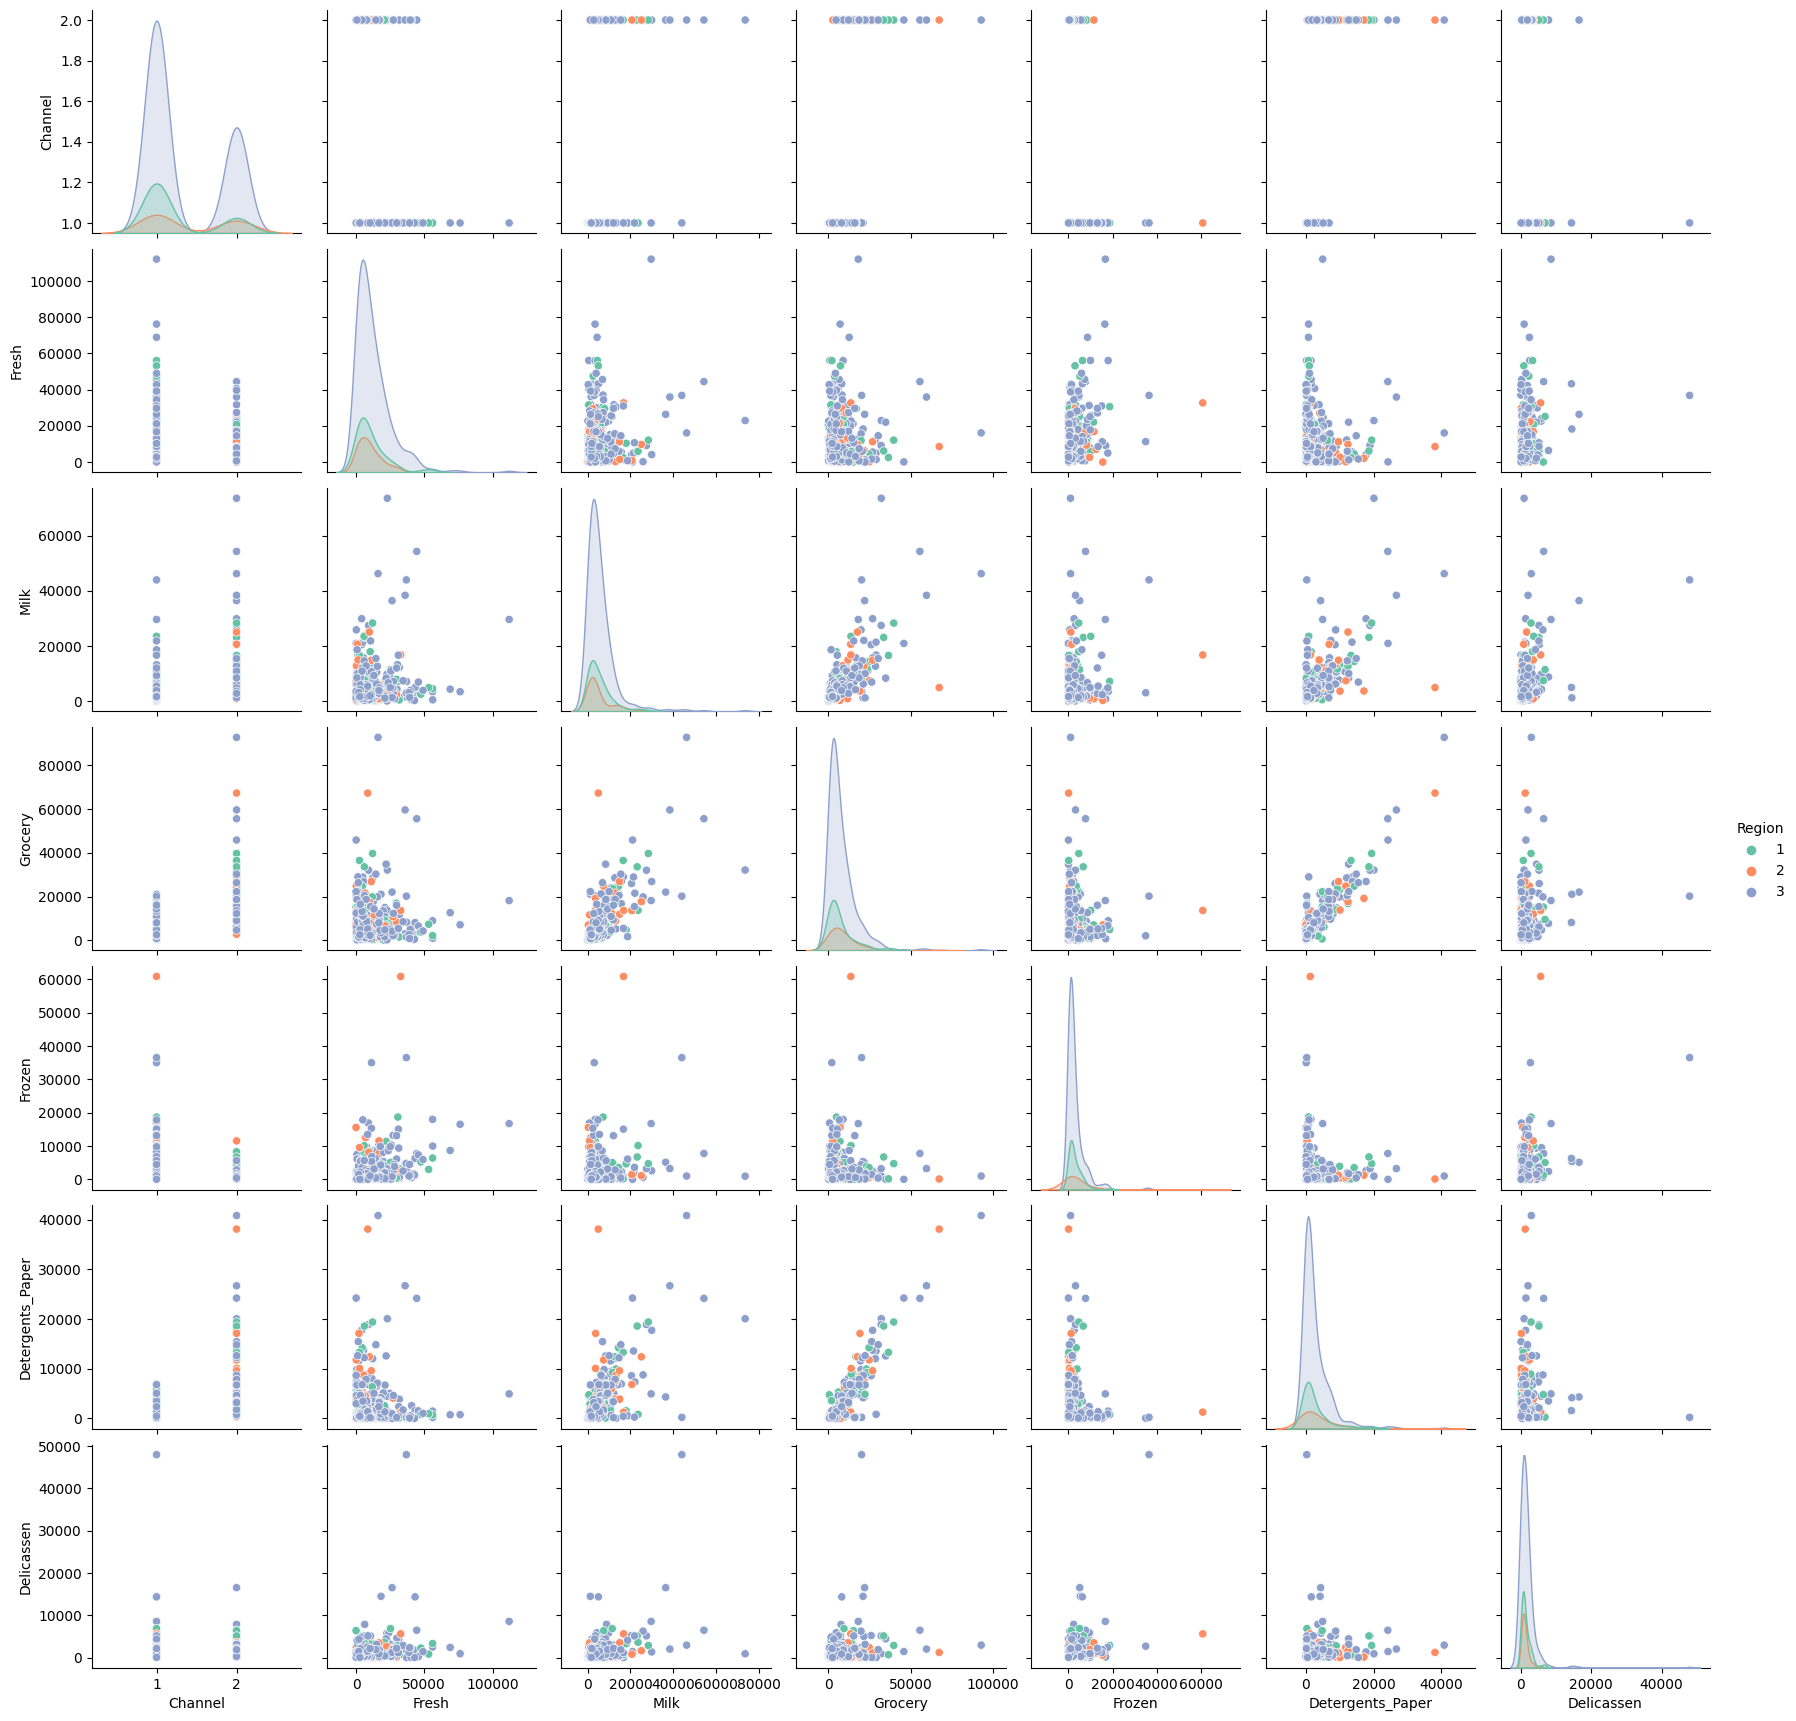

In [15]:
plt.figure(dpi = 200);
sns.pairplot(data = df, hue = 'Region', palette = 'Set2');

## DBSCAN

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sscaler = StandardScaler()

In [18]:
X = sscaler.fit_transform(df)

In [20]:
from sklearn.cluster import DBSCAN

In [27]:
outliers_percent = []

In [28]:
for eps in np.linspace(0.001, 4, 100):
    model = DBSCAN(eps = eps, min_samples = 2*len(df.columns))
    labels = model.fit_predict(X)
    outliers_percent.append(sum(labels < 0)*100/len(labels))
    

**Построим график lineplot для процента точек-выбросов в зависимости от значений эпсилон.**

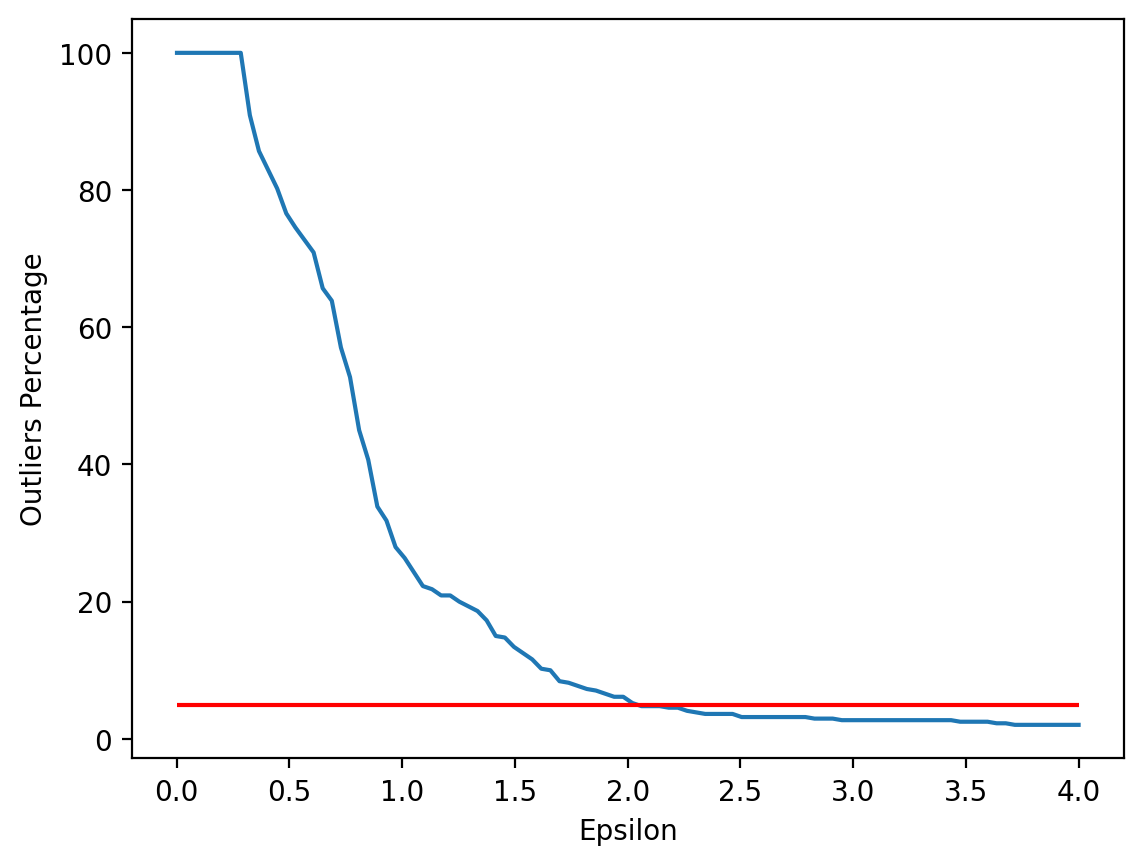

In [35]:
plt.figure(dpi = 200);
sns.lineplot(x = np.linspace(0.001, 4, 100), y = outliers_percent);
plt.xlabel('Epsilon');
plt.ylabel('Outliers Percentage');
plt.hlines(y = 5, xmin = 0, xmax = 4, color = 'r')

## DBSCAN для выбранного значения эпсилон

In [40]:
final_model = DBSCAN(eps = 2, min_samples = 2*len(df.columns))

**Построим график scatterplot для колонок Milk и Grocery, раскрашивая данные разными цветами по результатам работы модели DBSCAN.**

In [41]:
df['Label'] = final_model.fit_predict(X) 

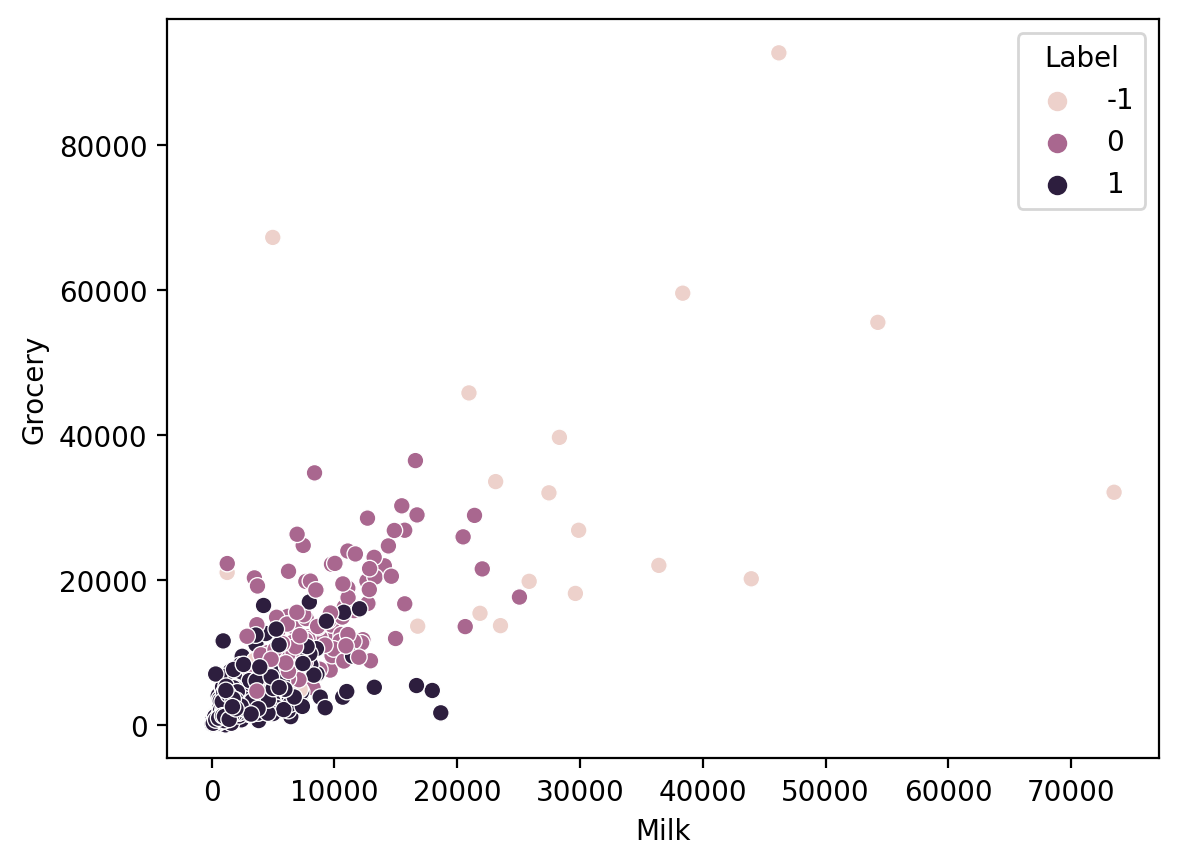

In [42]:
plt.figure(dpi = 200);
sns.scatterplot(data = df, x = 'Milk', y = 'Grocery', hue = 'Label');

**Построим аналогичный график scatterplot для колонок Milk и Detergents Paper.**

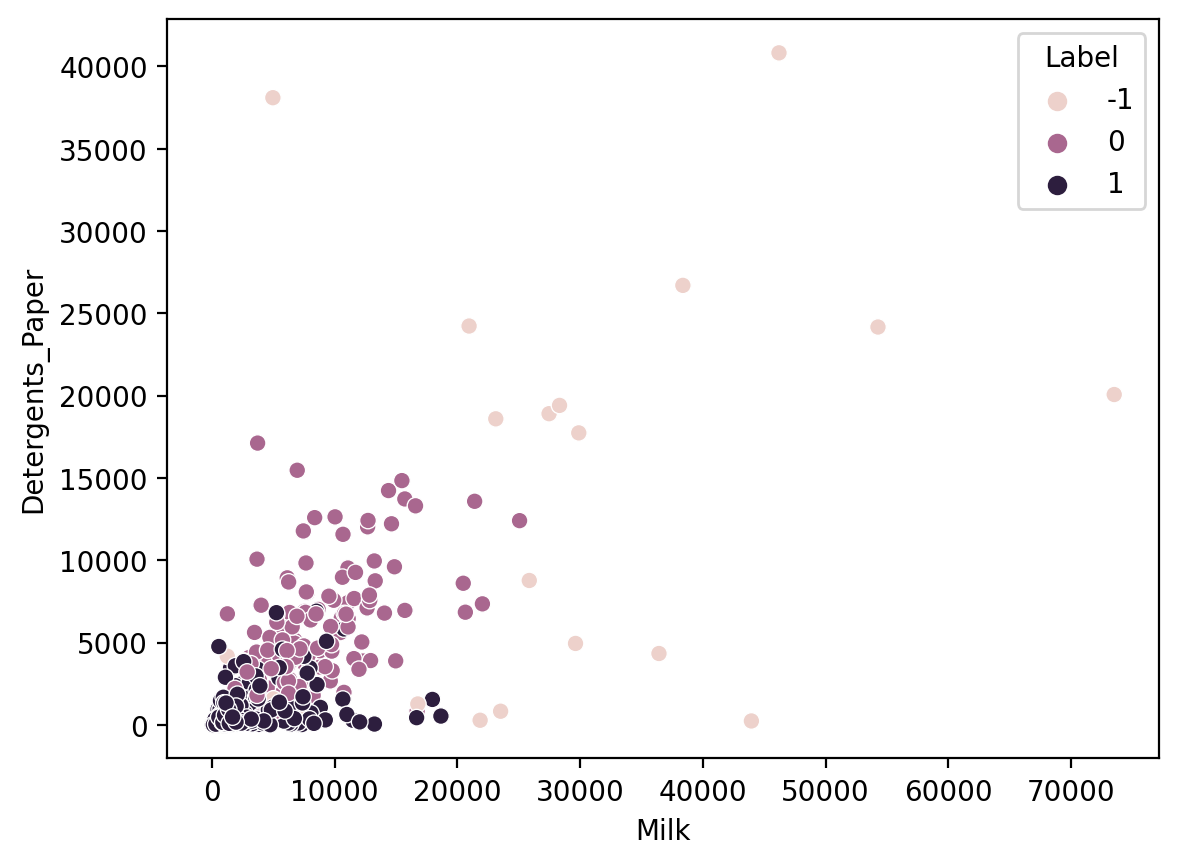

In [43]:
plt.figure(dpi = 200);
sns.scatterplot(data = df, x = 'Milk', y = 'Detergents_Paper', hue = 'Label');

In [44]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


**Вычислим средние значения расходов по различных категорий, причём отдельно для каждого из кластеров (включая кластер -1 для выбросов).**

In [54]:
mean_spend = df.drop(['Channel', 'Region'], axis = 1).groupby('Label').mean()

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
mean_spend = pd.DataFrame(MinMaxScaler().fit_transform(X = mean_spend), columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

In [59]:
mean_spend['Label'] = [-1, 0, 1]

In [60]:
mean_spend = mean_spend.set_index('Label')

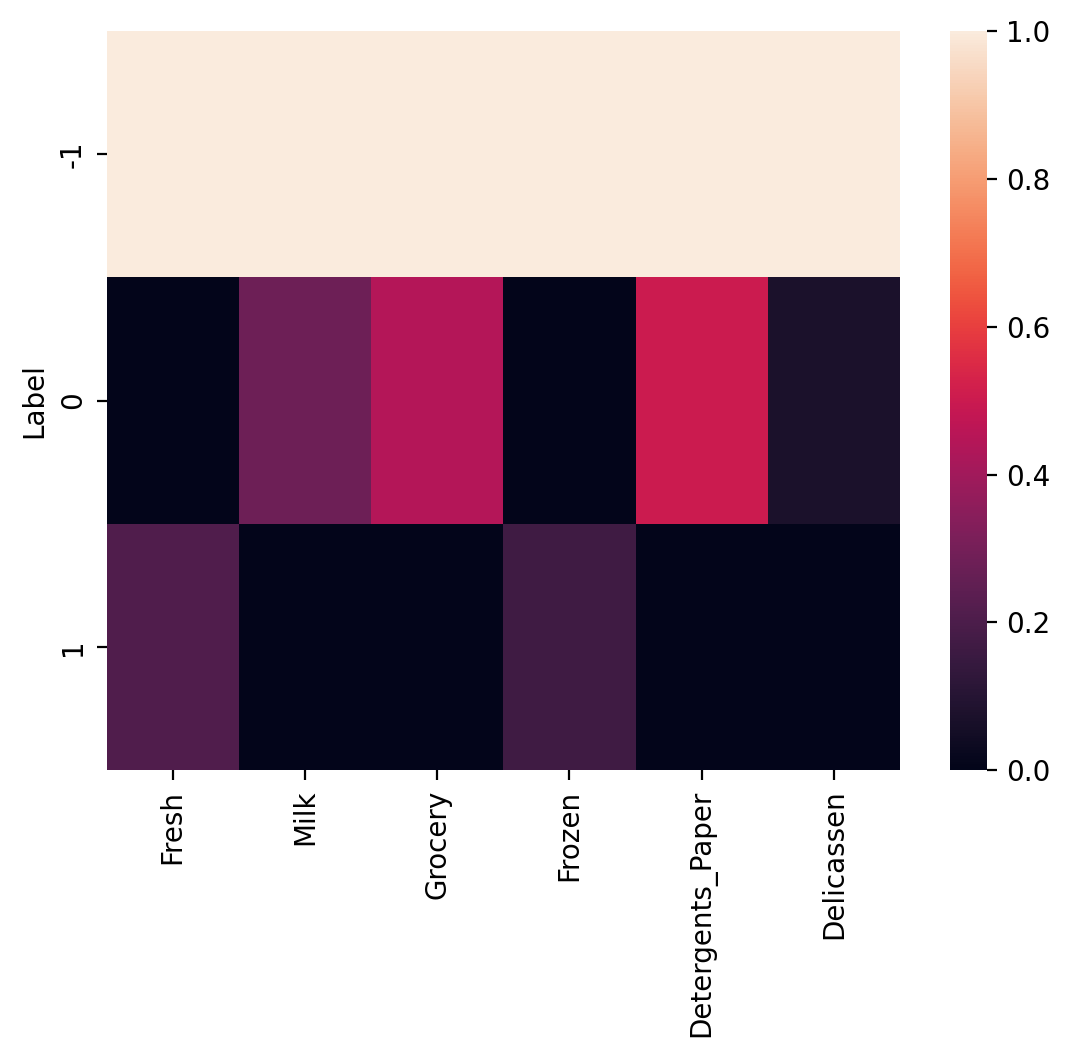

In [62]:
plt.figure(dpi = 200);
sns.heatmap(data = mean_spend);

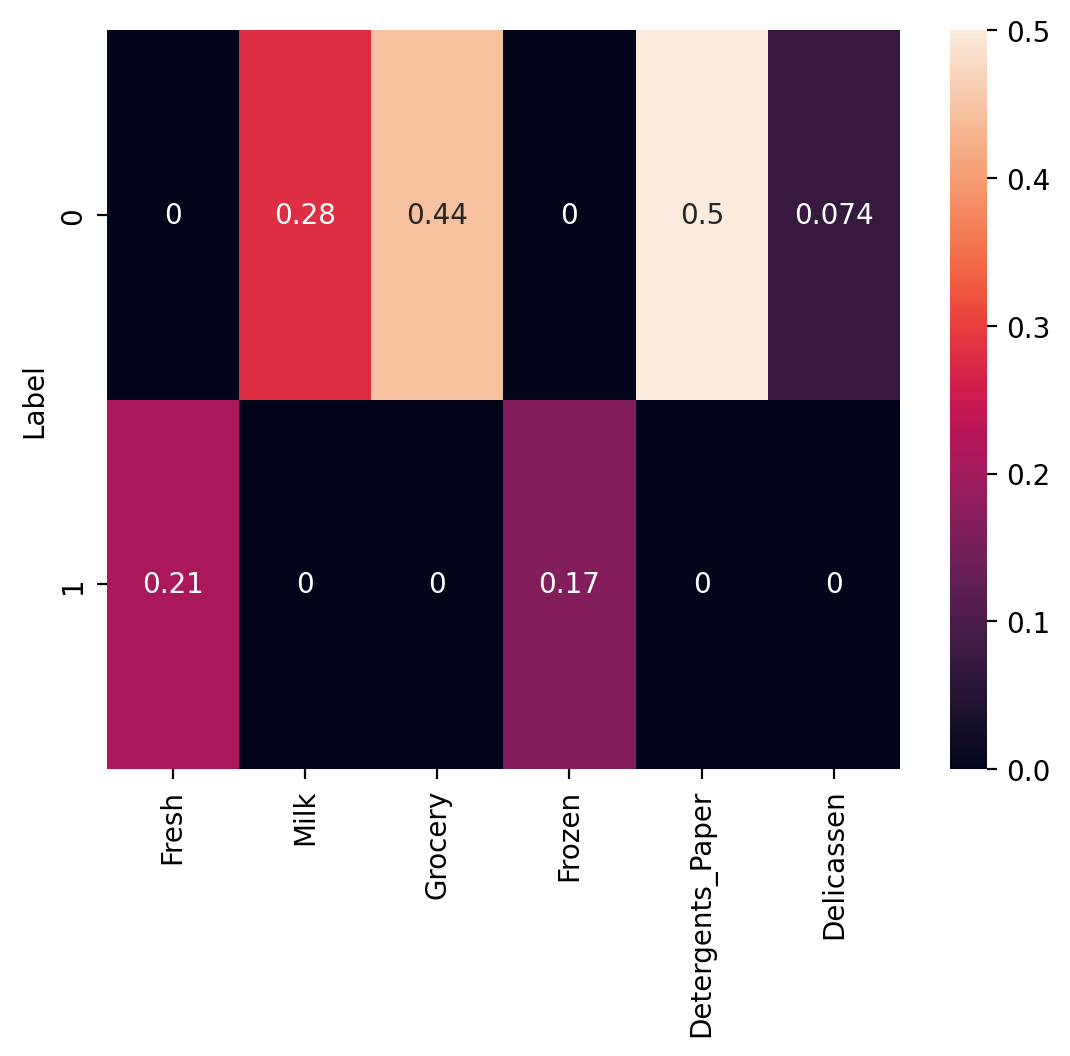

In [64]:
plt.figure(dpi = 200);
sns.heatmap(data = mean_spend.drop(-1, axis = 0), annot = True);

**По следующим категориям расходов эти два кластера различаются наиболее заметно: detergents_paper, grocery.**